In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from scipy import interp

In [66]:
df = pd.read_csv('message.csv')

In [67]:
df=df[['Message','Label']]

In [68]:
df.head(5)

,Message,Label
0,go until jurong point crazy available only ...,0
1,ok lar joking wif u oni,0
2,free entry in 2 a wkly comp to win fa cup fina...,1
3,u dun say so early hor u c already then say,0
4,nah i don t think he goes to usf he lives aro...,0


In [79]:
def word_occurence(df):
  unique = dict()
  for i in df['Message']:
    #print(i)
    for word in i.split():
      if word in unique:
        unique[word]+=1
      else:
        unique[word]=1
  return unique

In [110]:
from sklearn.model_selection import StratifiedKFold

In [123]:
def num_unique_words(data):
    unique = []
    data['Message'] = data['Message'].str.split()
    for message in data['Message']:
        for word in message:
            if word not in unique:
                unique.append(word)
    return unique,len(unique)

In [124]:
def count_of_unique(x,df):
  x.sort()
  unique=dict()
  for i in x:
    unique[i]=[0]*len(df['Message'])
  for id,m in enumerate(df['Message']):
    for w in m:
      unique[w][id]+=1
  unique_df = pd.DataFrame(unique)
  return unique_df

In [119]:
x,y = num_unique_words(df)

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat', 'ok', 'lar', 'joking', 'wif', 'u', 'oni', 'free', 'entry', '2', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', '87121', 'receive', 'question', 'std', 'txt', 'rate', 't', 'c', 's', 'apply', '08452810075over18', 'dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'nah', 'i', 'don', 'think', 'he', 'goes', 'usf', 'lives', 'around', 'here', 'though', 'freemsg', 'hey', 'darling', 'it', 'been', '3', 'week', 'now', 'and', 'no', 'word', 'back', 'd', 'like', 'some', 'fun', 'you', 'up', 'for', 'still', 'tb', 'xxx', 'chgs', 'send', '1', '50', 'rcv', 'even', 'my', 'brother', 'is', 'not', 'speak', 'with', 'me', 'they', 'treat', 'aids', 'patent', 'as', 'per', 'your', 'request', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'has', 'set', 'callertune', 'all', 'callers', 'press', '9

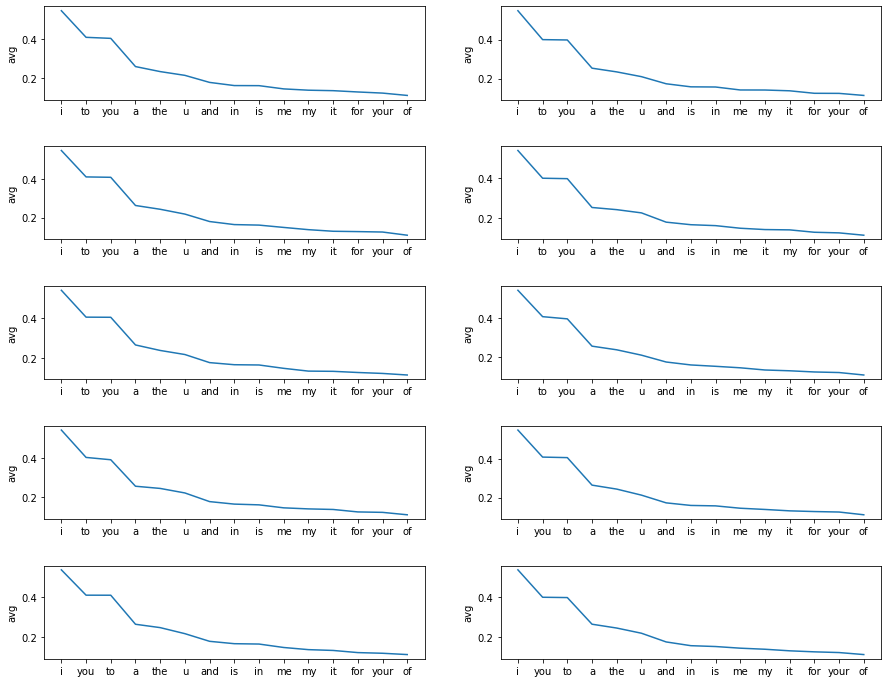

In [128]:
from sklearn.model_selection import StratifiedShuffleSplit
skfolds = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
i=0
ax=axs.ravel()
for train_index, test_index in skfolds.split(df, df['Label']):
    #print(train_index)
    x_train = df.loc[train_index]
    x_test = df.loc[test_index]
    #print(x_train)
    unique, unique_len = num_unique_words(x_train)
    df2 =count_of_unique(unique,x_train)
    mean_values=df2.mean(axis=0) 
    mean_values2=mean_values.sort_values(ascending=False)[:15]
    df3=mean_values2.to_frame(name='avg')
    #print(df3)
    sns.lineplot(x=df3.index,y='avg',data=df3,ax=ax[i])
    i=i+1
plt.show()

Maximum Likelihood Estimation

In [ ]:
def my_class_scores(result_list):
  for i in range(0,len(result_list)):
    #print("Confusion Matrix for Test Fold {} :".format(i))
    print(confusion_matrix(result_list[i]['Label'],result_list[i]['predicted_label']))
    #print("Classification Report for Test Fold {} :".format(i))
    print(classification_report(result_list[i]['Label'],result_list[i]['predicted_label']))

In [ ]:
def my_roc_func(result_list):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for i in range(0,len(result_list)):
    fpr, tpr, t = roc_curve(result_list[i]['Label'], result_list[i]['predicted_label'])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.text(0.32,0.7,'More accurate area',fontsize = 12)
  plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
  plt.show()

In [249]:
def num_unique_words2(df2):
  unique = dict()
  for i in df2['Message']:
    #print(i)
    for word in i.split():
      if word in unique:
        #unique[word]+=1
        pass
      else:
        unique[word]=1
  #print(unique)
  l=[]
  for i in unique:
    if unique[i]==1:
      l.append(i)
  #print(l)
  return l,len(l)

In [250]:
def word_occurence(df2):
  unique = dict()
  for i in df2['Message']:
    #print(i)
    for word in i.split():
      if word in unique:
        unique[word]+=1
      else:
        unique[word]=1
  return unique

In [381]:
def calc_likelihood_spam(x,prior_prob_1,pro_df,main_list):
  sent = x.split()
  sum = prior_prob_1
  c=0
  for i in sent:
    if i in main_list:
    #print(c)
    #print(i)
      num = pro_df[pro_df['words']==i]['Probabilty of words according to spam'].values[0]
    #print(num)
 
      if num!=0:
      #print(num[c])
      #sum = sum + math.log2(num)
        sum = sum*num
      #print(sum)
      #print("\t")
      else:
        sum = 0
        break
    c+=1
    #print(c)
  return sum

In [382]:
def calc_likelihood_normal(x,prior_prob_0,pro_df,main_list):
  sent = x.split()
  sum = prior_prob_0
  c=0
  for i in sent:
    if i in main_list:

    #print(c)
    #print(i)
      num = pro_df[pro_df['words']==i]['Probabilty of words according to normal'].values[0]
    #print(num)
 
      if num!=0:
      #print(num[c])
      #sum = sum + math.log2(num)
        sum = sum*num
      #print(sum)
      #print("\t")
      else:
        sum = 0
        break
    c+=1
    #print(c)
  return sum

In [392]:
def maximum_likelihood_estimation(x_train,probab_df,mle_prob):
  prior_prob_0 = x_train['Label'].value_counts()[0]/len(x_train)
  prior_prob_1 = x_train['Label'].value_counts()[1]/len(x_train)
  #print("Prior probability for label 0 is :",prior_prob_0)
  #print("Prior probability for label 1 is :",prior_prob_1)
  df_0 = x_train[x_train['Label']==0]
  df_1 = x_train[x_train['Label']==1]
  #print(df_0)
  #print(df_1)
  
  
  norm_list,norm_count = num_unique_words2(df_0)
  spam_list,spam_count = num_unique_words2(df_1)
  dict_of_norm = word_occurence(df_0)
  dict_of_spam = word_occurence(df_1)
  #print(probab_df)
  #print(mle_prob)

  #print("Dict of spam is:",dict_of_spam)
  #print("Dict of normal is:",dict_of_normal)

  probab_df['Probabilty of words according to normal'] = probab_df['words'].apply(lambda x: dict_of_norm[x]/norm_count if x in dict_of_norm else 0)
  probab_df['Probabilty of words according to spam'] = probab_df['words'].apply(lambda x: dict_of_spam[x]/spam_count if x in dict_of_spam else 0)
  
  #mle_prob['Likelihood Probability normal'] = mle_prob['Message'].apply(lambda x: calc_likelihood_normal(x,prior_prob_0,probab_df))
  #mle_prob['Likelihood Probability spam'] = mle_prob['Message'].apply(lambda x: calc_likelihood_spam(x,prior_prob_1,probab_df))
  #mle_prob['predicted_label']=np.where(mle_prob["Likelihood Probability normal"]>=mle_prob["Likelihood Probability spam"],0,1)
  print("Dataframe is done")
  return mle_prob,probab_df,prior_prob_0,prior_prob_1

Dataframe is done
___________________________________
TEST FOLD  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


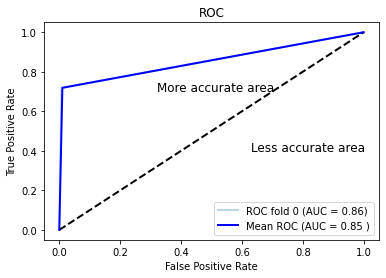

[[959   7]
 [ 42 107]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       966
           1       0.94      0.72      0.81       149

    accuracy                           0.96      1115
   macro avg       0.95      0.86      0.89      1115
weighted avg       0.96      0.96      0.95      1115

Dataframe is done
___________________________________
TEST FOLD  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


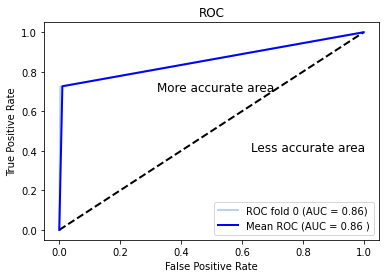

[[963   3]
 [ 41 108]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.97      0.72      0.83       149

    accuracy                           0.96      1115
   macro avg       0.97      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Dataframe is done
___________________________________
TEST FOLD  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


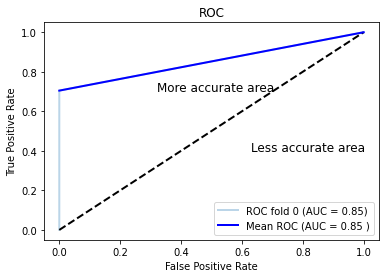

[[966   0]
 [ 44 105]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.83       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Dataframe is done
___________________________________
TEST FOLD  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


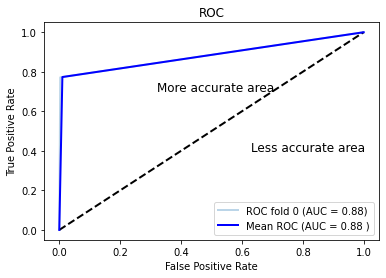

[[963   3]
 [ 34 115]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.97      0.77      0.86       149

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115

Dataframe is done
___________________________________
TEST FOLD  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


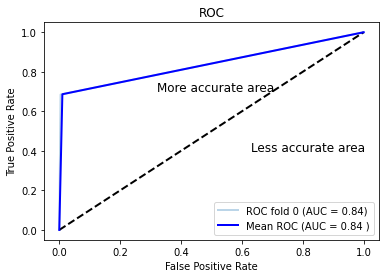

[[962   4]
 [ 47 102]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.96      0.68      0.80       149

    accuracy                           0.95      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.95      0.95      0.95      1115

Dataframe is done
___________________________________
TEST FOLD  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


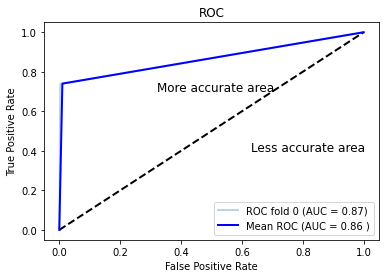

[[963   3]
 [ 39 110]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.97      0.74      0.84       149

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Dataframe is done
___________________________________
TEST FOLD  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


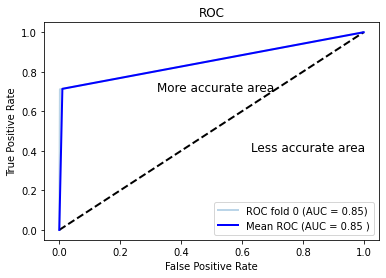

[[964   2]
 [ 43 106]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.98      0.71      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Dataframe is done
___________________________________
TEST FOLD  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


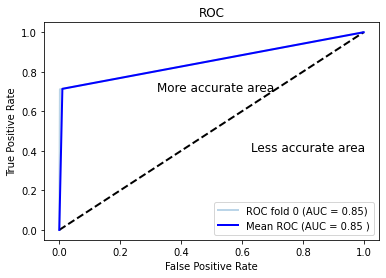

[[964   2]
 [ 43 106]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.98      0.71      0.82       149

    accuracy                           0.96      1115
   macro avg       0.97      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115

Dataframe is done
___________________________________
TEST FOLD  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


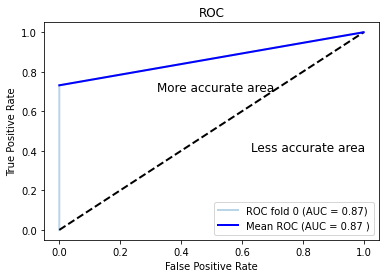

[[966   0]
 [ 40 109]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115

Dataframe is done
___________________________________
TEST FOLD  10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


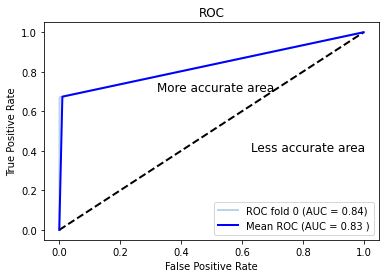

[[965   1]
 [ 49 100]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.99      0.67      0.80       149

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [428]:
skfolds2 = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)
count=0
for train_index, test_index in skfolds2.split(df, df['Label']):
    #print(train_index)
    x_train = df.loc[train_index]
    x_test = df.loc[test_index]
    #print("x_train is:",x_train)
    words,length = num_unique_words2(x_train)
    #print("words are:",words)
    #words_df =count_of_unique(words,x_train)
    #print(x_train)
    probab_df = pd.DataFrame(index=range(0,length),data=words,columns=['words'])
    probab_df['Probabilty of words according to normal']=0
    probab_df['Probabilty of words according to spam']=0

    mle_prob = pd.DataFrame(index=x_train.index,data=x_train.Message,columns=['Message'])
    mle_prob['Likelihood Probability normal']=0
    mle_prob['Likelihood Probability spam']=0
    test_df,pro_df,prior_0,prior_1=maximum_likelihood_estimation(x_train,probab_df,mle_prob)

    #x_test
    x_test['Likelihood Probability normal']=0
    x_test['Likelihood Probability spam']=0
    list_train,count_train=num_unique_words2(x_train)
    list_test,count_test=num_unique_words2(x_test)
    result_list2=[]
    main_list=[]
    for i in list_test:
      if i in list_train:
        main_list.append(i)
    x_test['Likelihood Probability normal'] = x_test['Message'].apply(lambda x: calc_likelihood_normal(x,prior_0,pro_df,main_list))
    x_test['Likelihood Probability spam'] = x_test['Message'].apply(lambda x: calc_likelihood_spam(x,prior_1,pro_df,main_list))
    x_test['predicted_label']=np.where(x_test["Likelihood Probability normal"]>=x_test["Likelihood Probability spam"],0,1)
    result_list2.append(x_test)
    #print("confusion matrix for test data {}".format(count))
    #print(classification_report(x_test['Label'],x_test['predicted_label']))
    count+=1

    print("_"*35)
    print("TEST FOLD ",count)

    my_roc_func(result_list2)
    my_class_scores(result_list2) 
    #performance_metrics(test_df)
    #remove the break if u need to run for all splits
    

In [331]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [401]:
def maximum_likelihood_estimation2(x_train,probab_df,mle_prob):
  prior_prob_0 = x_train['Label'].value_counts()[0]/len(x_train)
  prior_prob_1 = x_train['Label'].value_counts()[1]/len(x_train)
  #print("Prior probability for label 0 is :",prior_prob_0)
  #print("Prior probability for label 1 is :",prior_prob_1)
  df_0 = x_train[x_train['Label']==0]
  df_1 = x_train[x_train['Label']==1]
  #print(df_0)
  #print(df_1)
  
  
  norm_list,norm_count = num_unique_words2(df_0)
  spam_list,spam_count = num_unique_words2(df_1)
  dict_of_norm = word_occurence(df_0)
  dict_of_spam = word_occurence(df_1)
  #print(probab_df)
  #print(mle_prob)

  list_of_words,list_count = num_unique_words2(x_train)
  #print("Dict of spam is:",dict_of_spam)
  #print("Dict of normal is:",dict_of_normal)

  alpha = 1
  probab_df2['Probabilty of words according to normal'] = probab_df2['words'].apply(lambda x: (dict_of_norm[x]+alpha)/(norm_count+alpha*list_count) if x in dict_of_norm else (0+alpha)/(norm_count+alpha*list_count))
  probab_df2['Probabilty of words according to spam'] = probab_df2['words'].apply(lambda x: (dict_of_spam[x]+alpha)/(spam_count+alpha*list_count) if x in dict_of_spam else (0+alpha)/(spam_count+alpha*list_count))
  
  #mle_prob['Likelihood Probability normal'] = mle_prob['Message'].apply(lambda x: calc_likelihood_normal(x,prior_prob_0,probab_df))
  #mle_prob['Likelihood Probability spam'] = mle_prob['Message'].apply(lambda x: calc_likelihood_spam(x,prior_prob_1,probab_df))
  #mle_prob['predicted_label']=np.where(mle_prob["Likelihood Probability normal"]>=mle_prob["Likelihood Probability spam"],0,1)
  print("Dataframe is done")
  return mle_prob,probab_df2,prior_prob_0,prior_prob_1

In [425]:
def my_class_scores(result_list):
  for i in range(0,len(result_list)):
    #print("Confusion Matrix for Test Fold {} :".format(i))
    print(confusion_matrix(result_list[i]['Label'],result_list[i]['predicted_label']))
    #print("Classification Report for Test Fold {} :".format(i))
    print(classification_report(result_list[i]['Label'],result_list[i]['predicted_label']))

In [420]:
def my_roc_func(result_list):
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for i in range(0,len(result_list)):
    fpr, tpr, t = roc_curve(result_list[i]['Label'], result_list[i]['predicted_label'])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
  plt.text(0.32,0.7,'More accurate area',fontsize = 12)
  plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
  plt.show()

Dataframe is done
___________________________________
TEST FOLD  0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


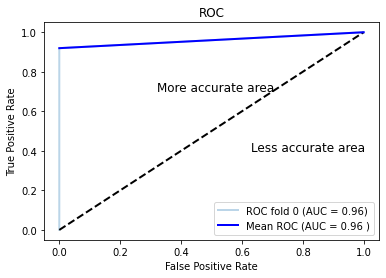

[[966   0]
 [ 12 137]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.92      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


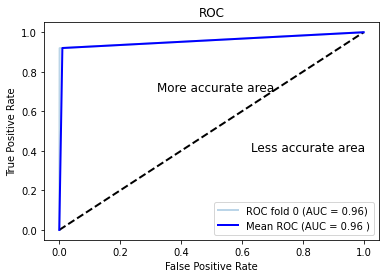

[[965   1]
 [ 12 137]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.92      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


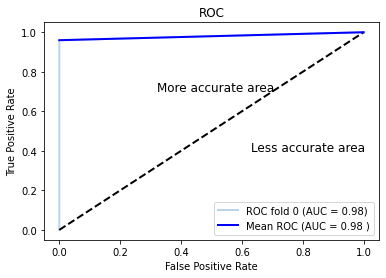

[[966   0]
 [  6 143]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.96      0.98       149

    accuracy                           0.99      1115
   macro avg       1.00      0.98      0.99      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


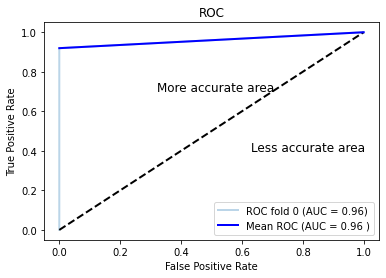

[[966   0]
 [ 12 137]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.92      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


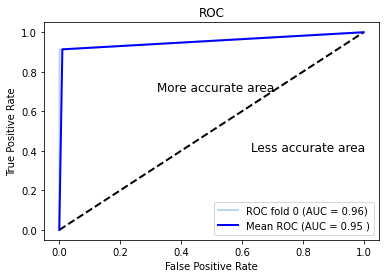

[[965   1]
 [ 13 136]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


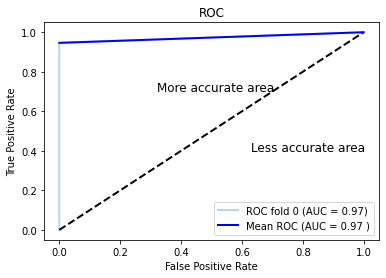

[[966   0]
 [  8 141]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


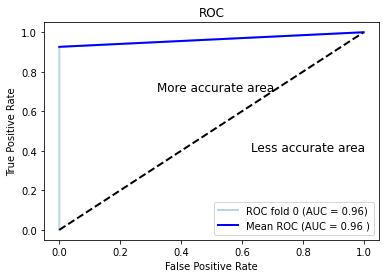

[[966   0]
 [ 11 138]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


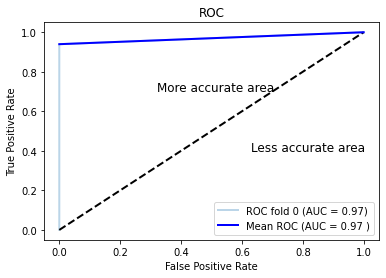

[[966   0]
 [  9 140]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  8


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


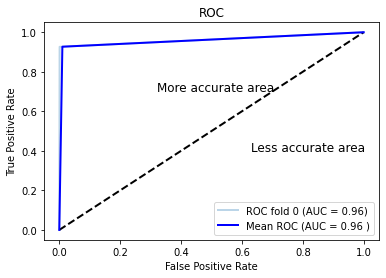

[[965   1]
 [ 11 138]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Dataframe is done
___________________________________
TEST FOLD  9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


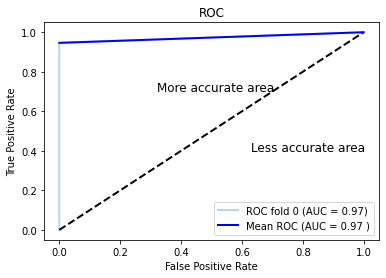

[[966   0]
 [  8 141]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.95      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [426]:
skfolds3 = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2)
count=0
for train_index, test_index in skfolds3.split(df, df['Label']):
    #print(train_index)
    x_train2 = df.loc[train_index]
    x_test2 = df.loc[test_index]
    #print("x_train is:",x_train)
    words,length = num_unique_words2(x_train2)
    #print("words are:",words)
    #words_df =count_of_unique(words,x_train)
    #print(x_train)
    probab_df2 = pd.DataFrame(index=range(0,length),data=words,columns=['words'])
    probab_df2['Probabilty of words according to normal']=0
    probab_df2['Probabilty of words according to spam']=0

    mle_prob2 = pd.DataFrame(index=x_train2.index,data=x_train2.Message,columns=['Message'])
    mle_prob2['Likelihood Probability normal']=0
    mle_prob2['Likelihood Probability spam']=0
    test_df_1,pro_df2,prior_0,prior_1=maximum_likelihood_estimation2(x_train2,probab_df2,mle_prob2)
    #performance_metrics(test_df)
    #remove the break if u need to run for all splits

    x_test2['Likelihood Probability normal']=0
    x_test2['Likelihood Probability spam']=0
    list_train,count_train=num_unique_words2(x_train)
    list_test,count_test=num_unique_words2(x_test2)
    result_list=[]
    main_list=[]
    for i in list_test:
      if i in list_train:
        main_list.append(i)
    x_test2['Likelihood Probability normal'] = x_test2['Message'].apply(lambda x: calc_likelihood_normal(x,prior_0,pro_df,main_list))
    x_test2['Likelihood Probability spam'] = x_test2['Message'].apply(lambda x: calc_likelihood_spam(x,prior_1,pro_df,main_list))
    x_test2['predicted_label']=np.where(x_test2["Likelihood Probability normal"]>=x_test2["Likelihood Probability spam"],0,1)
    result_list.append(x_test2)
    #print("confusion matrix for test data with laplace {}".format(count))
    #print(classification_report(x_test2['Label'],x_test2['predicted_label']))
    print("_"*35)
    print("TEST FOLD ",count)
    count+=1

    my_roc_func(result_list)
    my_class_scores(result_list)   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


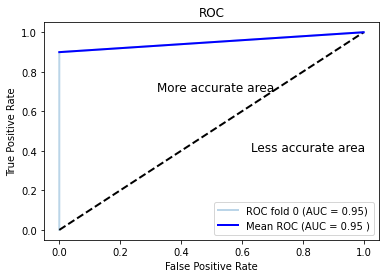